In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_15384\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('C:/Users/USER/Downloads/DATA/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

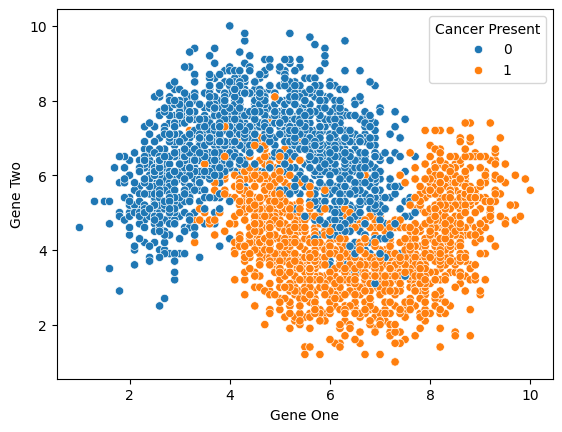

In [3]:
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [7]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
y_pred = knn_model.predict(scaled_X_test)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
confusion_matrix(y_test, y_pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [13]:
from sklearn.metrics import accuracy_score

In [15]:
1 - accuracy_score(y_test, y_pred)

0.08333333333333337

In [16]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(test_error)

Text(0, 0.5, 'K Neighbors')

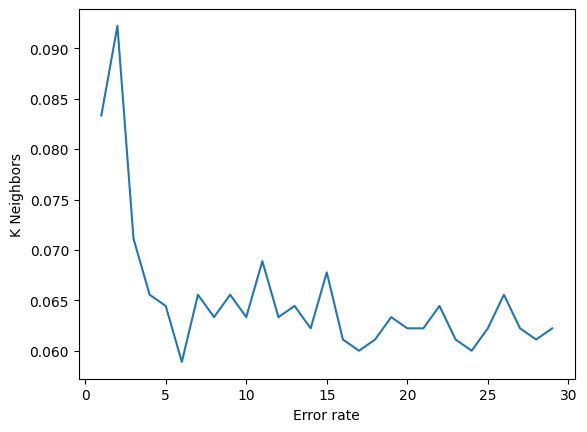

In [17]:
plt.plot(range(1,30), test_error_rates)
plt.xlabel('Error rate')
plt.ylabel('K Neighbors')

In [18]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [19]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [20]:
operations = [('scaler',scaler), ('knn',knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [21]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors':k_values}

In [22]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [23]:
full_cv_classifier.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])>

In [24]:
full_pred = full_cv_classifier.predict(X_test)

In [25]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [27]:
confusion_matrix(y_test, full_pred)

array([[392,  31],
       [ 25, 452]], dtype=int64)

In [28]:
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(scaled_X_train, y_train)
    
y_pred_5 = knn_model2.predict(scaled_X_test)

In [30]:
confusion_matrix(y_test, y_pred_5)

array([[393,  30],
       [ 28, 449]], dtype=int64)

In [33]:
new_patient = [[5,6.4]]
knn_model2.predict_proba(new_patient)

array([[0.6, 0.4]])